<a href="https://colab.research.google.com/github/macdi011/Gomycode/blob/main/_Optional__Peer_Graded_Assignment_jupyterlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [4]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


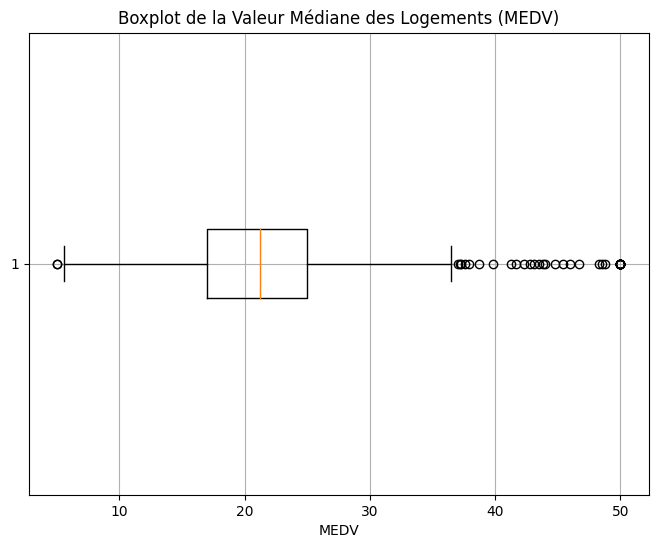

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Charger le dataset
# Supposons que vous avez déjà chargé le dataset boston_df depuis votre source de données

# Créer un boxplot pour la colonne MEDV
plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'], vert=False)  # vert=False pour un boxplot horizontal
plt.title('Boxplot de la Valeur Médiane des Logements (MEDV)')
plt.xlabel('MEDV')
plt.grid(True)
plt.show()


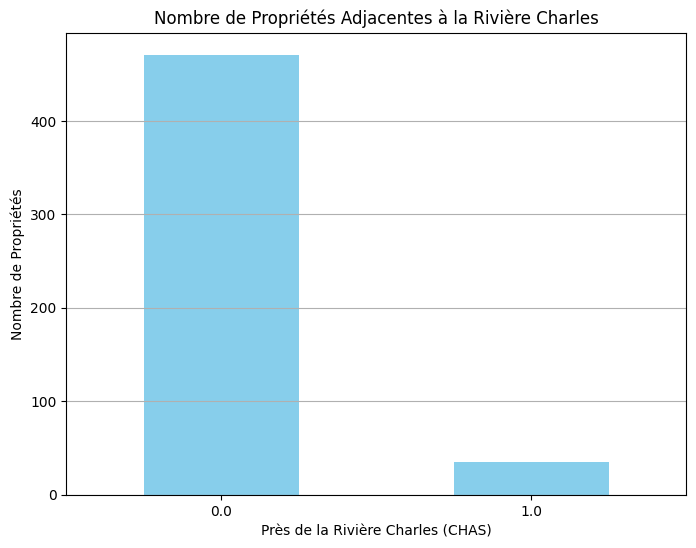

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Charger le dataset
# Supposons que vous avez déjà chargé le dataset boston_df depuis votre source de données

# Compter les occurrences de chaque valeur de la variable CHAS
chas_counts = boston_df['CHAS'].value_counts()

# Créer un diagramme à barres
plt.figure(figsize=(8, 6))
chas_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre de Propriétés Adjacentes à la Rivière Charles')
plt.xlabel('Près de la Rivière Charles (CHAS)')
plt.ylabel('Nombre de Propriétés')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


<Figure size 1000x600 with 0 Axes>

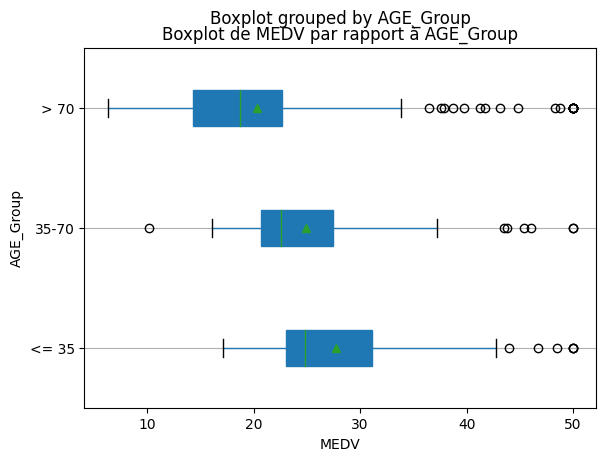

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Charger le dataset
# Supposons que vous avez déjà chargé le dataset boston_df depuis votre source de données

# Discrétisation de la variable AGE
# Création de catégories pour l'âge : <= 35, entre 35 et 70, et > 70
bins = [0, 35, 70, max(boston_df['AGE'])]  # définir les bords des intervalles
labels = ['<= 35', '35-70', '> 70']  # étiquettes pour les groupes d'âge
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Créer un boxplot pour MEDV par rapport à AGE_Group
plt.figure(figsize=(10, 6))
boston_df.boxplot(column='MEDV', by='AGE_Group', vert=False, patch_artist=True, showmeans=True)
plt.title('Boxplot de MEDV par rapport à AGE_Group')
plt.xlabel('MEDV')
plt.ylabel('AGE_Group')
plt.grid(axis='x')
plt.show()


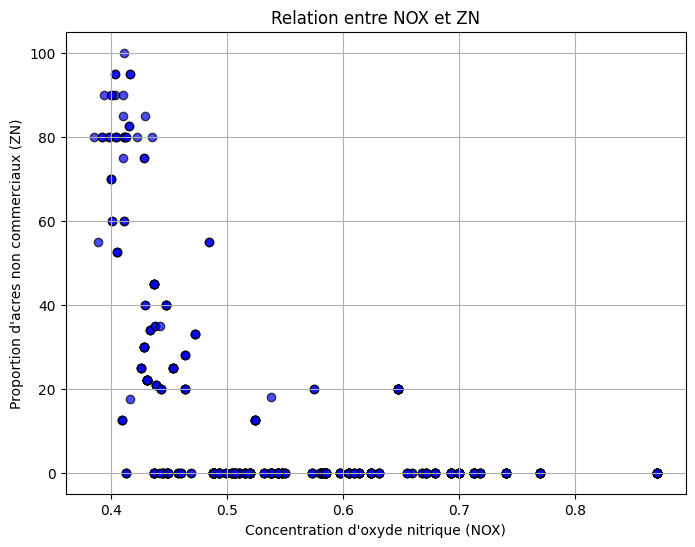

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Charger le dataset
# Supposons que vous avez déjà chargé le dataset boston_df depuis votre source de données

# Créer un nuage de points NOX vs ZN
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['ZN'], alpha=0.7, c='blue', edgecolors='k')
plt.title('Relation entre NOX et ZN')
plt.xlabel('Concentration d\'oxyde nitrique (NOX)')
plt.ylabel('Proportion d\'acres non commerciaux (ZN)')
plt.grid(True)
plt.show()


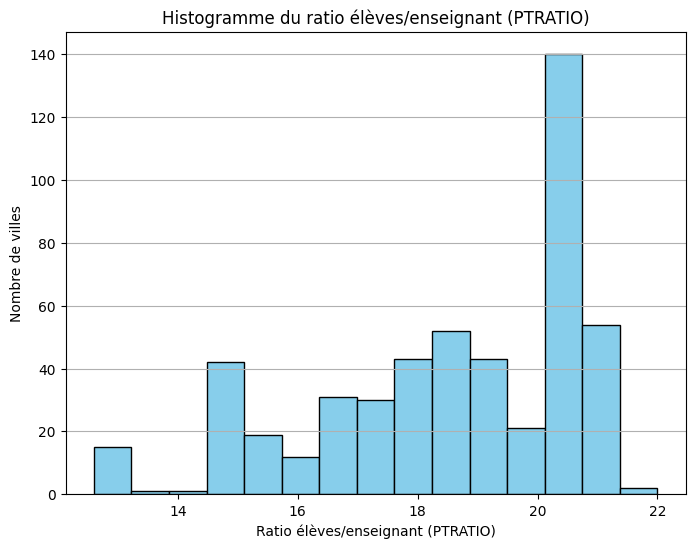

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Charger le dataset
# Supposons que vous avez déjà chargé le dataset boston_df depuis votre source de données

# Créer un histogramme pour la variable PTRATIO
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogramme du ratio élèves/enseignant (PTRATIO)')
plt.xlabel('Ratio élèves/enseignant (PTRATIO)')
plt.ylabel('Nombre de villes')
plt.grid(axis='y')
plt.show()


In [11]:
import pandas as pd
from scipy import stats

# Charger le dataset
# Supposons que vous avez déjà chargé le dataset boston_df depuis votre source de données

# Séparer les données en deux groupes : CHAS = 1 (près de la rivière Charles) et CHAS = 0 (pas près de la rivière Charles)
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Effectuer le test T pour échantillons indépendants
t_statistic, p_value = stats.ttest_ind(medv_chas1, medv_chas0)

# Afficher les résultats du test
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpréter le résultat du test
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print('Il y a une différence significative de valeur médiane des maisons bordées par la rivière Charles.')
else:
    print('Il n\'y a pas de différence significative de valeur médiane des maisons bordées par la rivière Charles.')


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Il y a une différence significative de valeur médiane des maisons bordées par la rivière Charles.


In [12]:
import pandas as pd
from scipy import stats

# Charger le dataset
# Supposons que vous avez déjà chargé le dataset boston_df depuis votre source de données

# Effectuer une ANOVA pour comparer les groupes définis par la variable AGE
# Nous allons utiliser la fonction f_oneway de scipy.stats pour l'ANOVA

# Séparer les données en différents groupes basés sur la variable AGE
# Création des groupes distincts pour chaque catégorie de AGE

age_groups = []
for category, group in boston_df.groupby(pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100])):
        age_groups.append(group['MEDV'])

# Application


In [16]:
import statsmodels.api as sm
import pandas as pd

# Charger le dataset
# Supposons que vous avez déjà chargé le dataset boston_df depuis votre source de données

# Préparer les données pour l'analyse de régression
# Replace '...' with the actual column names you want to include
X = boston_df[['DIS', 'RM', 'AGE']]  # Example: Added 'RM' and 'AGE' columns
y = boston_df['MEDV']

# Ajouter un terme constant à la matrice X
X = sm.add_constant(X)

# Créer le modèle de régression
model = sm.OLS(y, X)

# Ajuster le modèle
results = model.fit()

# Afficher un résumé des résultats
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           3.23e-83
Time:                        22:08:34   Log-Likelihood:                -1646.2
No. Observations:                 506   AIC:                             3300.
Df Residuals:                     502   BIC:                             3317.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.8728      3.178     -6.883      0.0

In [14]:
# Le coefficient pour "DIS" indique l'effet estimé de la distance pondérée sur la valeur médiane des logements occupés par leur propriétaire (MEDV).
 la valeur p pour "DIS" est inférieure à votre niveau de significativité (α = 0,05), donc il ya une correlation significative tance pondérée et MEDV.

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'AGE_Group'],
      dtype='object')
